- 모델의 파라미터를 확인해 어떤 특징량이 목적 변수에 얼마나 기여하는지 확인
    - 의사의 78%는 남자, 간호사 93%는 여자의 성비를 갖는 인터넷 의사, 간호사 이미지를 학습하여 여자 의사를 간호사로 잘못 분류하는 경우 발생
    - 훈련 이미지 데이터의 성비를 올바르게 수정하여 해결
- 머신러닝은 예측 개입뿐만 아니라 현상 파악을 목적으로도 사용 가능
- 이번 장에서는 캐글에 공개된 IBM 퇴직 예측 문제 데이터셋을 분석

> **상관관계가 있다고 인과관계가 있는 것은 아니다!**

---

# 8.1 구글 콜랩에 설치된 라이브러리 버전 업데이트 (현재 노트북에서 진행)

In [1]:
!pip3 install -U scikit-learn

     |████████████████████████████████| 8.6 MB 7.2 MB/s eta 0:00:01
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
     |████████████████████████████████| 55.6 MB 6.4 MB/s eta 0:00:012
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
     |████████████████████████████████| 18.1 MB 55.8 MB/s eta 0:00:01


In [1]:
import sklearn
sklearn.__version__

'1.1.1'

In [3]:
!pip3 install shap dtreeviz

     |████████████████████████████████| 436 kB 15.7 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 1.8 MB/s  eta 0:00:01
     |████████████████████████████████| 78 kB 43.2 MB/s eta 0:00:011
     |████████████████████████████████| 11.5 MB 67.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 78.2 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 21.9 MB/s eta 0:00:01
     |████████████████████████████████| 7.3 MB 76.2 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 91.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 87.1 MB/s eta 0:00:01
     |████████████████████████████████| 930 kB 52.5 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 24.5 MB/s  eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 25.5 MB 49.0 MB/s eta 0:00:01
     |████████████████████████████████| 17.7 MB 48.0 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 3

---

# 8.2 학습용 파일 업로드 및 확인(현재 노트북에서 진행)

- 파일 구조 확인

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

source_df = pd.read_csv('./data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
source_df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


- 변수 타입 확인

In [3]:
source_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

- 목적 변수(Attrition) 추출
> Attrition: 직원의 희망 퇴직, 정년 퇴직, 사망 등의 원인으로 자연적으로 감소된 인원
- Yes, No의 이진 값이므로 0, 1로 변환. 1은 이직, 0은 고용 상태

In [4]:
attrition_label = (source_df.Attrition == 'Yes').astype(np.int64)
attrition_label

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

- 의미 없는 값 제거(한 가지의 값만 갖는 경우)

In [5]:
single_value_column = source_df.nunique() == 1
source_df.drop(source_df.columns[single_value_column], axis=1, inplace=True)

- 데이터를 숫자 타입과 범주 타입으로 구분

In [6]:
# 범줏값 추출

categorical_df = source_df.select_dtypes(include=['object'])
categorical_df.drop(['Attrition'], axis=1, inplace=True) # 목적 변수는 제거
categorical_df

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [7]:
# 숫자 타입 추출. EmployeeNumber와 같은 개인을 특정할 수 있는 특징량은 과적합의 원인이 되므로 제거

numerical_df = source_df.select_dtypes(include=['int64'])
numerical_df.drop(['EmployeeNumber'], axis=1, inplace=True)
numerical_df

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


- 범주 타입 데이터를 원-핫 인코딩하여 숫자 타입으로 변환 

In [8]:
converted_df = pd.concat([numerical_df, pd.get_dummies(categorical_df)], axis=1)

- 상관 행렬을 통해 데이터 경향 파악

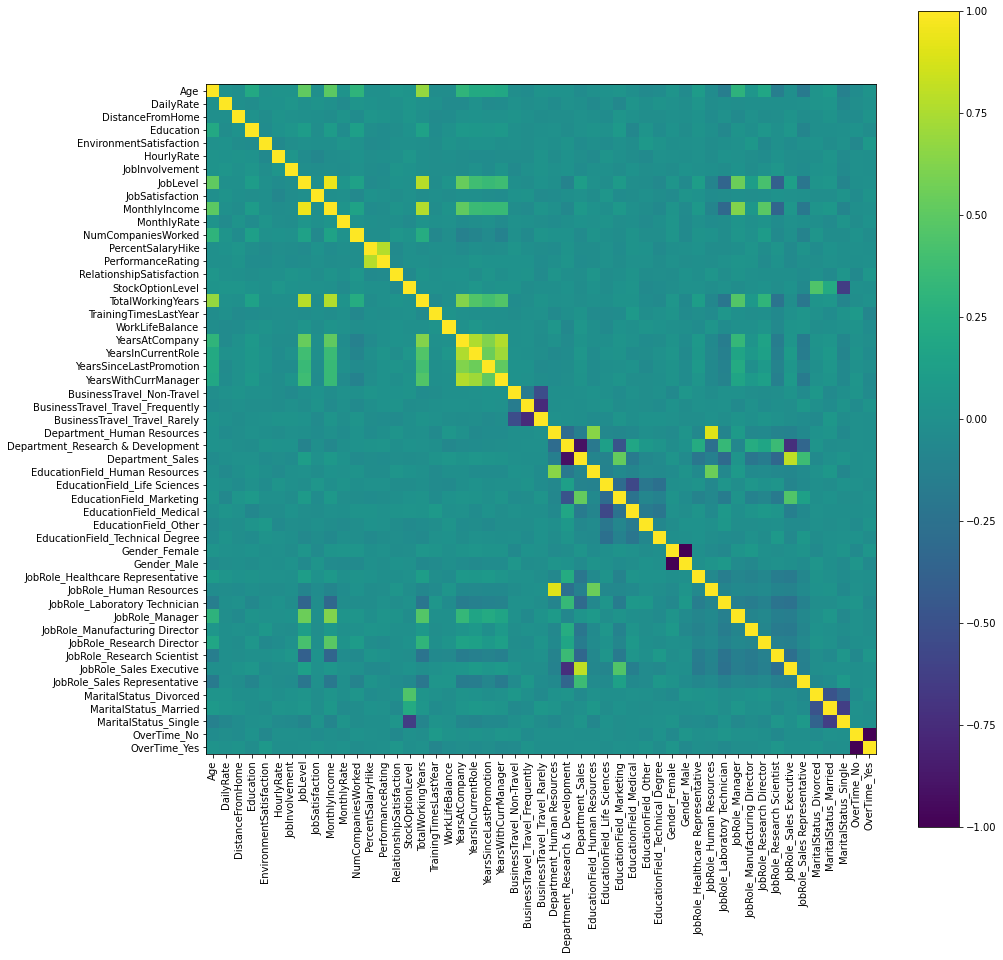

In [9]:
plt.figure(figsize=(15,15))
plt.imshow(converted_df.corr(), interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(converted_df.columns)), converted_df.columns, rotation='vertical')
plt.yticks(range(len(converted_df.columns)), converted_df.columns)
plt.show()

- Age, JobLevel, MonthlyIncom, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearWithCurrManager 주위에 상관관계가 강함

---

# 8.3 선형 회귀 계수를 이용한 원인 해석

- 선형 회귀는 데이터 경향에 따라 성능이 매우 강력하기도 하나 해당 알고리즘의 특성을 이해하지 못하면 잘못된 결론을 도출할 가능성이 있다.
- 회귀 계수와 절편 확인

In [10]:
import sklearn.linear_model

linear_model = sklearn.linear_model.LinearRegression()
linear_model.fit(converted_df, attrition_label)

linear_model_coef = list(zip(converted_df.columns, linear_model.coef_))
linear_model_coef.append(('intercept', linear_model.intercept_))
linear_model_coef

[('Age', -0.0034971408162115464),
 ('DailyRate', -2.636998761940201e-05),
 ('DistanceFromHome', 0.0036068480404781804),
 ('Education', 0.0017222192308997642),
 ('EnvironmentSatisfaction', -0.040502088614117616),
 ('HourlyRate', -0.00017550515338865744),
 ('JobInvolvement', -0.05798579466088019),
 ('JobLevel', -0.004882466209328008),
 ('JobSatisfaction', -0.0371584508087131),
 ('MonthlyIncome', 1.2948843340561433e-06),
 ('MonthlyRate', 4.584874628978066e-07),
 ('NumCompaniesWorked', 0.017212379169059624),
 ('PercentSalaryHike', -0.002177532904306371),
 ('PerformanceRating', 0.01846735837060065),
 ('RelationshipSatisfaction', -0.02301744733244286),
 ('StockOptionLevel', -0.017022043769190365),
 ('TotalWorkingYears', -0.003724955264940822),
 ('TrainingTimesLastYear', -0.013506928678868895),
 ('WorkLifeBalance', -0.031387116754425605),
 ('YearsAtCompany', 0.0054928942644922795),
 ('YearsInCurrentRole', -0.009205359488122341),
 ('YearsSinceLastPromotion', 0.010821393431852892),
 ('YearsWith

> **coef_**: 가중치 또는 계수를 포함하는 멤버 변수  
> **intercept_**: 편향 또는 절편을 포함하는 멤버 변수

- 유효한 특징량 확인

In [11]:
def check_coef(column_names, coef_list, intercept=None):
    weights = dict(zip(column_names, coef_list))
    if intercept:
        weights['intercept'] = intercept
    df = pd.DataFrame.from_dict(weights, orient='index')
    df.columns = ['coef']
    df.sort_values(by='coef', key=lambda t:abs(t), inplace=True, ascending=False)
    print(df.head(10))

In [12]:
check_coef(converted_df.columns, linear_model.coef_, linear_model.intercept_)

                                       coef
intercept                          0.874182
JobRole_Sales Representative       0.164880
JobRole_Human Resources            0.124988
OverTime_Yes                       0.105340
OverTime_No                       -0.105340
JobRole_Research Director         -0.092631
JobRole_Healthcare Representative -0.090496
EducationField_Human Resources     0.085261
BusinessTravel_Travel_Frequently   0.079816
Department_Human Resources        -0.078630


- 선형회귀는 특징량이 크기가 작았던 것의 계수가 크게 나타나는 경향이 있다.
- 따라서 스케일 조정이 필요하다.
- Min Max Scaler를 이용한 정규화 수행

In [13]:
import sklearn.preprocessing

scaler = sklearn.preprocessing.MinMaxScaler()
standardization_df = pd.DataFrame(scaler.fit_transform(converted_df), index=converted_df.index, columns=converted_df.columns)
standardization_df

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.25,0.666667,0.157143,1.000000,0.25,1.000000,0.082254,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1466,0.500000,0.365784,0.178571,0.00,1.000000,0.171429,0.333333,0.50,0.000000,0.472986,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1467,0.214286,0.037938,0.107143,0.50,0.333333,0.814286,1.000000,0.25,0.333333,0.270300,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1468,0.738095,0.659270,0.035714,0.50,1.000000,0.471429,0.333333,0.25,0.333333,0.230700,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [14]:
linear_model = sklearn.linear_model.LinearRegression()
linear_model.fit(standardization_df, attrition_label)
check_coef(converted_df.columns, linear_model.coef_, linear_model.intercept_)

                                          coef
Gender_Female                    -4.126631e+13
Gender_Male                      -4.126631e+13
intercept                         2.672076e+13
OverTime_Yes                      1.040448e+13
OverTime_No                       1.040448e+13
BusinessTravel_Non-Travel        -7.317927e+12
BusinessTravel_Travel_Rarely     -7.317927e+12
BusinessTravel_Travel_Frequently -7.317927e+12
MaritalStatus_Single              4.339301e+12
MaritalStatus_Divorced            4.339301e+12


- 다중공선성<sup>multi-colinearity</sup>로 인해 값이 발산
- 다중공선성: 한 특징량이 다른 특징량과 매우 비슷해 예측 가능한 상태에 있음. 다중공선성이 강한 열이 존재하면 선형 회귀는 과적합 되어 잘못된 결과를 반환한다.
- pd.get_cummies를 실행할 때 drop_first 옵션을 활성화 하면 원-핫 인코딩 시 n-1 종류의 데이터로 만들 수 있어 다중공선성을 피할 수 있다(세 종류 이상의 값에서는 알파벳 순으로 가장 빠른 값이 버려진다).
- 다만 한 종류의 데이터를 버렸기 때문에 버린 데이터가 결과에 얼마나 영향을 미치는지는 알기 어려움
- 다중공선성이 있는 데이터에서는 라쏘 회귀나 릿지 회귀, 일래스틱넷과 같이 정규항을 추가해 회귀 계수가 커지는 것을 억제하는 알고리즘을 사용한다.

In [15]:
converted_dropped_df = pd.concat([numerical_df, pd.get_dummies(categorical_df, drop_first=True)], axis=1)
scaler = sklearn.preprocessing.MinMaxScaler()
standardization_dropped_df = pd.DataFrame(scaler.fit_transform(converted_dropped_df), 
                                          index=converted_dropped_df.index, 
                                          columns=converted_dropped_df.columns)
linear_model = sklearn.linear_model.LinearRegression()
linear_model.fit(standardization_dropped_df, attrition_label)
check_coef(standardization_dropped_df.columns, linear_model.coef_, linear_model.intercept_)

                                  coef
intercept                     0.327084
JobRole_Sales Representative  0.255376
YearsAtCompany                0.219716
JobRole_Human Resources       0.215485
OverTime_Yes                  0.210679
JobInvolvement               -0.173957
YearsInCurrentRole           -0.165696
YearsWithCurrManager         -0.162449
YearsSinceLastPromotion       0.162321
NumCompaniesWorked            0.154911


---

# 8.4 로지스틱 회귀 계수로 원인 해석

- 선형 분류기의 파라미터를 확인해 이직 원인 찾기
- 로지스틱 회귀(분류기)를 활용
- 실제로는 데이터를 학습 데이터와 테스트 데이터로 분리하고 C 파라미터를 업데이트하면서 과적합 여부를 확인해야 한다.

In [16]:
lr_model = sklearn.linear_model.LogisticRegression(C=0.1)
lr_model.fit(standardization_dropped_df, attrition_label)
check_coef(standardization_dropped_df.columns, lr_model.coef_[0], lr_model.intercept_[0])

                                      coef
OverTime_Yes                      1.259661
JobInvolvement                   -0.719254
EnvironmentSatisfaction          -0.673118
JobSatisfaction                  -0.660775
BusinessTravel_Travel_Frequently  0.651580
MaritalStatus_Single              0.633452
JobRole_Laboratory Technician     0.566878
NumCompaniesWorked                0.564474
DistanceFromHome                  0.527556
Age                              -0.524708


---

# 8.5 회귀 계수 p값 구하기

- 선형 회귀는 오차나 특잇값에 취약해 해석하는 것이 어렵다.
- 실무에서는 statsmodels.api.OLS를 많이 사용.
- **OLS**<sup>ordinary least squares</sup>: 최소 제곱법. 각 회귀 계수 뿐만 아니라 p값 신뢰 구간을 동시에 출력. p값이 큰 특징량은 목적 변수에 기여하지 않는다고 판단

In [39]:
!pip3 install -U statsmodels

     |████████████████████████████████| 9.6 MB 15.1 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 80.5 MB/s eta 0:00:01


In [17]:
import statsmodels.api

ols_df = standardization_dropped_df.copy()
ols_df['const'] = 1
ols_model = statsmodels.api.OLS(attrition_label, ols_df)
fit_result = ols_model.fit()
fit_summary = fit_result.summary2()
print(fit_summary)

                         Results: Ordinary least squares
Model:                   OLS                   Adj. R-squared:          0.235    
Dependent Variable:      Attrition             AIC:                     882.5729 
Date:                    2022-06-29 08:32      BIC:                     1120.7587
No. Observations:        1470                  Log-Likelihood:          -396.29  
Df Model:                44                    F-statistic:             11.24    
Df Residuals:            1425                  Prob (F-statistic):      6.55e-65 
R-squared:               0.258                 Scale:                   0.10356  
---------------------------------------------------------------------------------
                                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------------------
Age                               -0.1469   0.0557 -2.6363 0.0085 -0.2562 -0.0376
DailyRate                         -0.0368

In [18]:
sorted_ols_coef = fit_summary.tables[1].sort_values(by='Coef.', key=lambda t:abs(t), ascending=False)
sorted_ols_coef = sorted_ols_coef[sorted_ols_coef['P>|t|'] < 0.05]
sorted_ols_coef[:10]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,0.327084,0.138981,2.353445,1.873557e-02,0.054455,0.599714
JobRole_Sales Representative,0.255376,0.086063,2.967310,3.054277e-03,0.086552,0.424200
OverTime_Yes,0.210679,0.018954,11.115247,1.387315e-27,0.173498,0.247860
JobInvolvement,-0.173957,0.035970,-4.836179,1.467103e-06,-0.244517,-0.103398
YearsInCurrentRole,-0.165696,0.069743,-2.375807,1.764221e-02,-0.302507,-0.028886
YearsWithCurrManager,-0.162449,0.067498,-2.406732,1.622254e-02,-0.294855,-0.030043
YearsSinceLastPromotion,0.162321,0.051224,3.168860,1.562894e-03,0.061839,0.262803
NumCompaniesWorked,0.154911,0.034255,4.522336,6.623404e-06,0.087716,0.222107
BusinessTravel_Travel_Frequently,0.152732,0.033034,4.623450,4.115873e-06,0.087931,0.217533
Age,-0.146880,0.055715,-2.636271,8.473313e-03,-0.256172,-0.037588


---

# 8.6 결정 트리를 시각화해 원인 해석

- 결정 트리나 랜덤 포레스트는 다중공선성을 크게 신경쓰지 않아도 된다.
- 특징량을 정규화 하지 않아도 동작에 문제가 없다.
- 결정 트리로 시각화 하는 경우 트리 깊이는 3 또는 4정도가 좋다.
- 트리의 깊이를 $n$이라고 했을 때 마지막 노드의 숫자는 $2^n$이 된다.

[Text(0.5, 0.875, 'OverTime_No <= 0.5\ngini = 0.27\nsamples = 1470\nvalue = [1233, 237]'),
 Text(0.25, 0.625, 'MonthlyIncome <= 2475.0\ngini = 0.424\nsamples = 416\nvalue = [289, 127]'),
 Text(0.125, 0.375, 'DailyRate <= 931.0\ngini = 0.423\nsamples = 69\nvalue = [21, 48]'),
 Text(0.0625, 0.125, 'gini = 0.214\nsamples = 41\nvalue = [5, 36]'),
 Text(0.1875, 0.125, 'gini = 0.49\nsamples = 28\nvalue = [16, 12]'),
 Text(0.375, 0.375, 'MaritalStatus_Single <= 0.5\ngini = 0.352\nsamples = 347\nvalue = [268, 79]'),
 Text(0.3125, 0.125, 'gini = 0.261\nsamples = 246\nvalue = [208, 38]'),
 Text(0.4375, 0.125, 'gini = 0.482\nsamples = 101\nvalue = [60, 41]'),
 Text(0.75, 0.625, 'TotalWorkingYears <= 2.5\ngini = 0.187\nsamples = 1054\nvalue = [944, 110]'),
 Text(0.625, 0.375, 'JobRole_Research Scientist <= 0.5\ngini = 0.442\nsamples = 88\nvalue = [59, 29]'),
 Text(0.5625, 0.125, 'gini = 0.495\nsamples = 60\nvalue = [33, 27]'),
 Text(0.6875, 0.125, 'gini = 0.133\nsamples = 28\nvalue = [26, 2]'),
 T

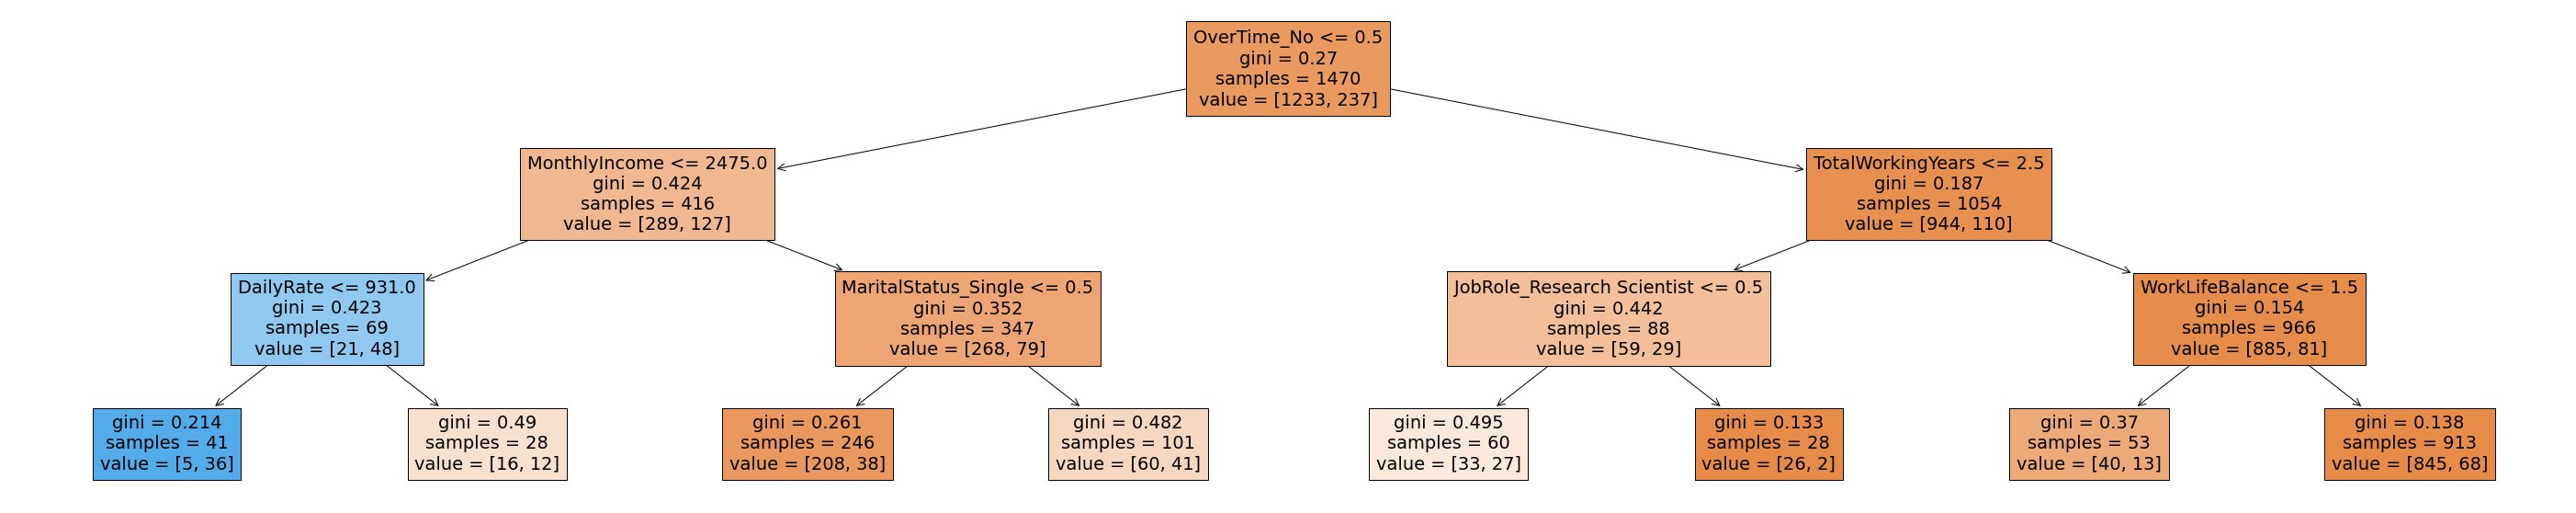

In [19]:
import sklearn.tree

dt_model = sklearn.tree.DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(converted_df, attrition_label)

plt.figure(figsize=(50, 10))
sklearn.tree.plot_tree(dt_model, feature_names=converted_df.columns, filled=True)

- 결정 트리를 활용하면 특정 조건을 조합한 원인을 찾아낼 수 있다.

In [21]:
#!pip3 install -U dtreeviz
!conda install Graphviz

#import os

#os.environ["PATH"]+=os.pathsep+'~/opt/anaconda3/envs/mlConda/lib/python3.9/site-packages/graphviz//bin/'

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



/Users/mazdah/opt/anaconda3/envs/mlConda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


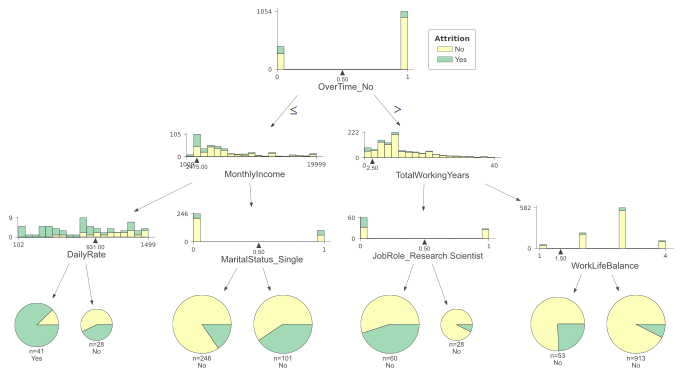

In [20]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(dt_model,
               converted_df,
               attrition_label,
               target_name='Attrition',
               feature_names=converted_df.columns,
               class_names=['No', 'Yes'])
viz                           

---

# 8.7 랜덤 포레스트의 Feature Importance 시각화

- 랜덤 포레스트나 GBDT와 같은 여러 결정 트리를 활용한 학습기에서는 Feature Importance라는 파라미터를 통해 분류나 회귀에 기여하는 특징량을 파악할 수 있다.

In [22]:
import sklearn.ensemble

rf_model = sklearn.ensemble.RandomForestClassifier(
    n_estimators=300,
    min_samples_leaf=100,
    max_depth=5,
    n_jobs=-1,
    random_state=42)

rf_model.fit(converted_df, attrition_label)
check_coef(converted_df.columns, rf_model.feature_importances_)

                          coef
MonthlyIncome         0.119744
OverTime_Yes          0.118544
OverTime_No           0.107013
JobLevel              0.087204
TotalWorkingYears     0.086532
YearsAtCompany        0.077841
StockOptionLevel      0.072223
YearsWithCurrManager  0.056186
Age                   0.050884
MaritalStatus_Single  0.033496


- 랜덤 포레스트는 다중공선성이 있는 특징량이 포함되면 Feature Importance값이 분산되어 작아지므로 주의해야 한다.

In [25]:
# 의도적으로 같은 특징량을 포함한 데이터를 분석한 경우
# 복제된 MonthlyIncome이 경향도가 낮아진다.

duplicated_df = converted_df.copy()
for i in range(10):
    duplicated_df['MonthlyIncome{}'.format(i)] = duplicated_df.MonthlyIncome
    
rf_model = sklearn.ensemble.RandomForestClassifier(
    n_estimators=300,
    min_samples_leaf=100,
    max_depth=5,
    n_jobs=-1,
    random_state=42)

rf_model.fit(duplicated_df, attrition_label)
check_coef(duplicated_df, rf_model.feature_importances_)

                       coef
OverTime_Yes       0.068042
MonthlyIncome8     0.067456
OverTime_No        0.063503
MonthlyIncome9     0.052984
MonthlyIncome6     0.051916
TotalWorkingYears  0.050806
MonthlyIncome3     0.048600
StockOptionLevel   0.048092
MonthlyIncome2     0.045324
MonthlyIncome1     0.042143


- 특징량 사이의 상관관계를 의미하는 다중공선성은 상관 행렬을 활용해 미리 확인하는 것이 좋다.
- 실질적으로 랜텀 포레스트가 결정 트리라고 해도 랜덤 포레스트의 내용을 시각화해서 판단하는 것은 위험하다.

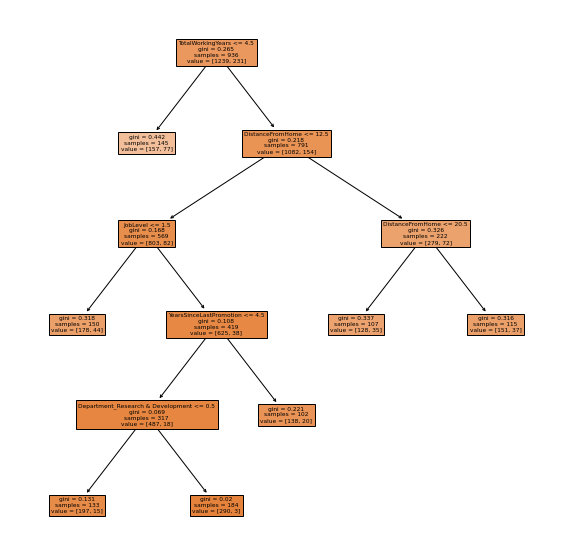

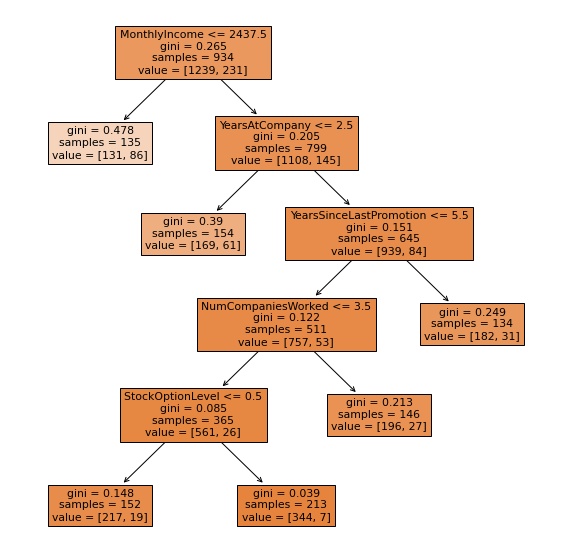

In [26]:
rf_model.fit(converted_df, attrition_label)
plt.figure(figsize=(10, 10))
sklearn.tree.plot_tree(
    rf_model.estimators_[0],
    feature_names=converted_df.columns,
    filled=True)
plt.show()

plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(
    rf_model.estimators_[1],
    feature_names=converted_df.columns,
    filled=True)
plt.show()

- 랜덤 포레스트는 결정 트리를 만들 때 활용하는 특징량을 무작위로 선택하면서 다양성을 가진 결정 트리를 생성한다. 이로 인해 중요한 특징량이 결손되기도 하므로 결과를 그대로 판단해서는 안된다.

---

# 8.8 SHAP을 활용한 기여도 시각화

- 트리 모델 시각화의 문제점
    - 결정 트리를 활용한 시각화에서는 결정 트리 값의 변화 방향에 따라 분류 결과가 달라지는 양상을 파악하기 쉽다. 그러나 한 번에 많은 변수를 볼 수는 없다.
    - 앙상블 트리 모델<sup>ensemble tree model</sup>인 Feature Importance에는 특징량 분류 기여도는 알 수 있어도 특징량이 커지면 분류 결과의 변화 정도를 알기 어렵다.
- 이러한 문제점을 해결한 시각화 라이브러리로 SHAP<sup>SHapley Additive exPlanations</sup>가 있다.
    - 분류 모델은 회귀 모델로 사용할 수도 있지만 목적 변수가 이진값이면 회귀 모델로 입력하는 것이 시각화가 잘 된다.

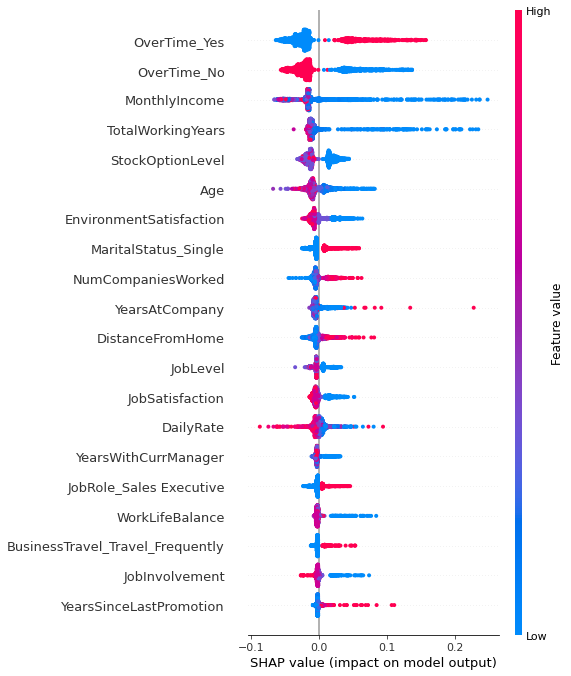

In [29]:
import shap

rf_model = sklearn.ensemble.RandomForestRegressor(
    n_estimators=300,
    max_depth=5,
    n_jobs=-1,
    random_state=42
)
rf_model.fit(converted_df, attrition_label)

shap.initjs()
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(converted_df)
shap.summary_plot(shap_values, converted_df)

- SHAP의 summary_plot 해석
    - 세로축은 위에서부터 순서대로 목적 변수에 기여한 변수다. 랜덤 포레스트의 Feature Importance와 동일
    - 가로축은 SHAP Value 0.00을 기준으로 왼쪽일수록 목적 변수에 읨의 방향, 오른쪽에 있을수록 양의 방향으로 기여한다.
    - 값의 색은 특징량의 값을 의미한다. 파란색은 낮은 값, 빨간색은 높은 값이다.
    - 파란색이 왼쪽, 빨간색이 오른쪽으로 넓게 퍼져 있으면 특징량은 목적 변수와 강한 상관관계가 있는 겻이며, 반대의 경우라면 음의 상관관계가 있는 것이다. 색이 섞여있거나 좌우로 좁게 퍼져있다면 목적 변수에 크게 기여하지 않는다는 의미이다.

---

# 8.9 SHAP을 활용한 직원 만족도 시각화

- 목적 변수를 직원 만족도로, 나머지 변수들을 설명 변수로 하여 시각화

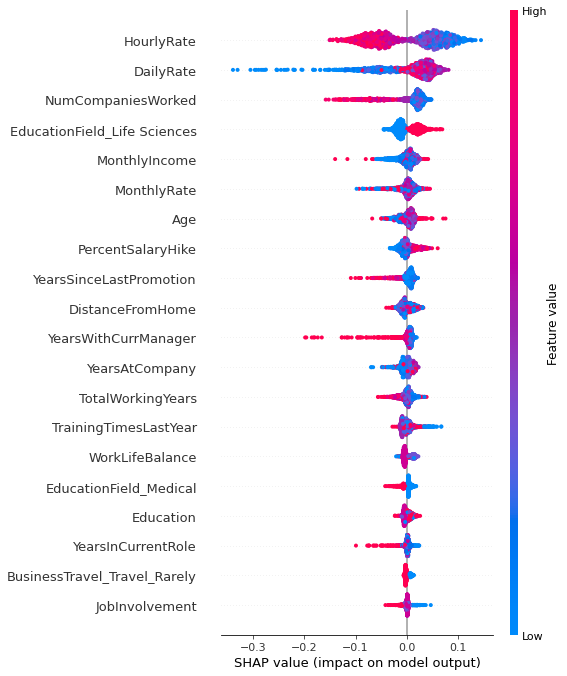

In [30]:
target_label = "JobSatisfaction"
X = converted_df.drop([target_label], axis=1)
Y = converted_df[target_label]

rf_model = sklearn.ensemble.RandomForestRegressor(
    n_estimators=300,
    max_depth=5,
    n_jobs=-1,
    random_state=42
)

rf_model.fit(X, Y)
shap.initjs()
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

---

# 8.10 정리

- 머신러닝은 사람이 쉽게 이해하지 못한다는 이유로 블랙박스라고 불린다.
- 머신러닝 모델이 판단을 한 이유를 설명하는 것은 머신러닝 비지니스를 도입할 때 꼭 필요한 과정이다.
- 머신러닝 결과를 해석할 때는 머신러닝의 특성을 이해해야 한다.